In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import tanh
from IPython.display import clear_output


In [2]:
from MLP import *
from gridSearch import *

In [3]:
f_target = lambda x: x**3-x**2

tx = np.sort( (2*np.random.rand(300)-1)*2 )
ty = np.array( [f_target(x)+(2*np.random.rand()-1) for x in tx ])#.reshape(1,-1)

tx = (tx-np.min(tx))/(np.max(tx)-np.min(tx))
tx = tx.reshape(-1,1)
ty = ty.reshape(-1,1)

data = np.hstack((tx,ty))
data.shape

(300, 2)

In [ ]:
n = MLP(  Nh=[2,3], Nu=1, Ny=1, f='tanh', f_out='ide', w_scale=5 )
plt.plot(tx,ty,label='target fuction')
outs = n.supply_sequence(tx).reshape(-1)


plt.plot(tx,outs,label='network outputs')
plt.legend()
print( MSE(outs,ty))

In [ ]:
e, _ = n.train(tx, ty, 5e-02,
  a = 1e-02,
  l = 0,
  max_epochs = 1000,
  tresh = .1,
  measure_interval = 10 )
clear_output()
plt.plot(e)

In [ ]:
plt.plot(tx,ty,label='target function')
outs = n.supply_sequence(tx)
outs = outs.reshape(ty.shape)
plt.plot(tx,outs.reshape(-1),label='network outputs')
plt.legend()

print( MSE(outs,ty))
print( n.test_error(tx,ty))

In [ ]:
params=[
        {
         'hidden_units': [[10]],
         'learning_rate': [5e-02, 1e-02],
         'alpha': [5e-01, 9e-01],
         'lambda' : [0],
         "weights_range": [.7],
         "weights_scale": [2], # numero cifre decimali pesi
         "Nu":[1],
         "Ny":[1],
         'activation': ['tanh'],
         "f_out":['ide'],
         "loss":['squared_error'],
         "error":['MSE']
        }
      ]

def xy(set):
    return set[:,0].reshape(-1,1), set[:,1].reshape(-1,1)

k_fold_CV(data, params, k=4, n_init=5, max_epochs=1000, measure_interval=10, tresh=.1,xy=xy)


# Monk test 1

In [ ]:
import pandas as pd

data = pd.read_csv('monks-1.train',sep=' ',index_col=8)
data = data.drop(columns = data.columns[0])
data = data.to_numpy()

ty = data[:100,0] ; ty = to_categorical(ty).reshape(-1,2,1)
tx = data[:100,1:]

vy = data[100:,0] ; vy = to_categorical(vy).reshape(-1,2,1)
vx = data[100:,1:]

In [ ]:
from scipy.special import softmax

n = MLP(  Nh=[30,10], Nu=6, Ny=2, f='relu', f_out='softmax', w_scale=5, loss='cross_entropy', error='cross_entropy')
outs = n.supply_sequence(tx)
print( n.error(outs,ty))

In [ ]:
e, v = n.train(tx, ty, 5e-02,
  a = 1e-6,
  l = 1e-9,
  val_x = vx,
  val_y = vy,
  max_epochs = 1000,
  tresh = 1e-03,
  measure_interval = 10 )

plt.plot(e)
plt.plot(v)

In [ ]:
data = read_dataset( filename='./monk_tests/monks-1.train', id_col=8 )

params=[
        {
         'hidden_units': [[10],[25],[50]],
         'learning_rate': [1e-01, 1e-02, 1e-03],
         'alpha': [1e-01, 1e-02, 1e-03, 0],
         'lambda' : [1e-01, 1e-02, 1e-03, 1e-10, 1e-12, 0],
         'activation': ['relu', 'tanh'],
         "weights_range": [0.7],
         "weights_scale": [2],
         "Nu":[6],
         "Ny":[2],
         'activation': ['tanh'],
         "f_out":['ide'],
         "loss":['squared_error'],
         "error":['MSE']
        }
      ]

def xy_monk1(set):
    x,y = set[:,1:] , set[:,:1]
    y = to_categorical(y).reshape(-1,2,1)
    return x,y

k_fold_CV(data, params, k=2, n_init=2, max_epochs=1000, measure_interval=50, tresh=.1,xy=xy_monk1)

# Monk test 2


In [ ]:
import pandas as pd
data = pd.read_csv('monks-2.train',sep=' ',index_col=8)
data = data.drop(columns = data.columns[0])
data = data.to_numpy()

ty = data[:100,0] ; ty[ty==0] = ty[ty==0]-1
tx = data[:100,1:]

vy = data[100:,0] ; vy[vy==0] = vy[vy==0]-1
vx = data[100:,1:] 

n = MLP(  Nh=[30,100], Nu=6, Ny=2, f=relu, f_out=softmax, w_scale=.7 ,loss=cross_entropy)
outs = n.supply_sequence(tx)
print( MSE(outs,ty))

e, v = n.train(tx, ty, 5e-02,
  a = 1e-6,
  l = 1e-12,
  val_x = vx,
  val_y = vy,
  max_epochs = 1000,
  tresh = 1e-03,
  epoch_f = n.epoch_batch_BP,
  measure_interval = 10 )

plt.plot(e)
plt.plot(v)

# cup

In [4]:
data = pd.read_csv('cup/ML-CUP20-TR.csv',sep=',',index_col=0)
data = data.to_numpy()

tx = data[:,:-2]
ty = data[:,-2:]

def xy_monk1(data):
    x = data[:,:-2]
    y = data[:,-2:]
    return x,y

tx.shape, ty.shape

((1523, 10), (1523, 2))

5.720977765179693


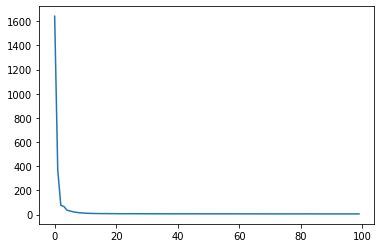

In [22]:
n = MLP(  Nh=[50,30], Nu=10, Ny=2, f='tanh', f_out='ide', w_scale=2, w_range=.7)
print('init', n.test_error(tx,ty))
print( )

e, _ = n.train(tx, ty, 1e-03,
  a = 9e-01,
  l = 1e-12,
  max_epochs = 1000,
  tresh = .1,
  measure_interval = 10 )
clear_output()
plt.plot(e,label = 'train')
print( n.test_error(tx,ty))

In [5]:
params=[
        {
         'hidden_units': [[50,30]],
         'learning_rate': [5e-02, 1e-02, 1e-03],
         'alpha': [5e-01, 9e-01],
         'lambda' : [1e-12,1e-5],
         "weights_range": [.7],
         "weights_scale": [2], # numero cifre decimali pesi
         "Nu":[10],
         "Ny":[2],
         'activation': ['tanh'],
         "f_out":['ide'],
         "loss":['squared_error'],
         "error":['MSE']
        }
      ]

def xy(data):
    x = data[:,:-2]
    y = data[:,-2:]
    return x,y


c,e = k_fold_CV(data, params, k=3, n_init=5, max_epochs=1000, measure_interval=10, tresh=.1,xy=xy)

configuration {'hidden_units': [50, 30], 'learning_rate': 0.05, 'alpha': 0.5, 'lambda': 1e-05, 'weights_range': 0.7, 'weights_scale': 2, 'Nu': 10, 'Ny': 2, 'activation': 'tanh', 'f_out': 'ide', 'loss': 'squared_error', 'error': 'MSE'}, 1/12
initialization 0
 (1015, 10), (1015, 2), (508, 10), (508, 2) 
fold 0 done, error 10.998038476865627
 (1015, 10), (1015, 2), (508, 10), (508, 2) 
fold 1 done, error 8.679292674352558
 (1016, 10), (1016, 2), (507, 10), (507, 2) 
fold 2 done, error 8.34174947428354
initialization 1
 (1015, 10), (1015, 2), (508, 10), (508, 2) 
fold 0 done, error 9.404520889572117
 (1015, 10), (1015, 2), (508, 10), (508, 2) 
fold 1 done, error 7.738359052388096
 (1016, 10), (1016, 2), (507, 10), (507, 2) 
fold 2 done, error 7.878358437089734
initialization 2
 (1015, 10), (1015, 2), (508, 10), (508, 2) 
fold 0 done, error 9.588485484606428
 (1015, 10), (1015, 2), (508, 10), (508, 2) 
fold 1 done, error 8.55520337856086
 (1016, 10), (1016, 2), (507, 10), (507, 2) 
fold 2 d

In [6]:
print(c)
print(e)

{'hidden_units': [50, 30], 'learning_rate': 0.001, 'alpha': 0.9, 'lambda': 1e-05, 'weights_range': 0.7, 'weights_scale': 2, 'Nu': 10, 'Ny': 2, 'activation': 'tanh', 'f_out': 'ide', 'loss': 'squared_error', 'error': 'MSE'}
6.459044801501399


In [ ]:
params=[ 
        {
         'hidden_units': [[50]],
         'learning_rate': [5e-02, 1e-02, 1e-03],
         'alpha': [5e-01, 9e-01],
         'lambda' : [1e-12,1e-5],
         "weights_range": [.7],
         "weights_scale": [2], # numero cifre decimali pesi
         "Nu":[10],
         "Ny":[2],
         'activation': ['tanh'],
         "f_out":['ide'],
         "loss":['squared_error'],
         "error":['MSE']
        }
      ]

def xy(data):
    x = data[:,:-2]
    y = data[:,-2:]
    return x,y


c,e = k_fold_CV(data, params, k=3, n_init=5, max_epochs=1000, measure_interval=10, tresh=.1,xy=xy)

In [ ]:
print(c)
print(e)

In [ ]:
params=[
        {
         'hidden_units': [[64,32]],
         'learning_rate': [5e-02, 1e-02, 1e-03],
         'alpha': [5e-01, 9e-01],
         'lambda' : [1e-12,1e-5],
         "weights_range": [.7],
         "weights_scale": [2], # numero cifre decimali pesi
         "Nu":[10],
         "Ny":[2],
         'activation': ['tanh'],
         "f_out":['ide'],
         "loss":['squared_error'],
         "error":['MSE']
        }
      ]

def xy(data):
    x = data[:,:-2]
    y = data[:,-2:]
    return x,y


c,e = k_fold_CV(data, params, k=3, n_init=5, max_epochs=1000, measure_interval=10, tresh=.1,xy=xy)

In [ ]:
print(c)
print(e)